# Imports

In [1]:
!pip install nltk pandas

In [2]:
!pip install wordcloud matplotlib

In [3]:
!pip install transformers

In [4]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from zipfile import ZipFile
import os

In [5]:
nltk.download('movie_reviews')
nltk.download('punkt')  # Для токенизации
nltk.download('stopwords')  # Для стоп-слов
nltk.download('wordnet')  # Для лемматизации
nltk.download('omw-1.4')  # Для поддержки лемматизации

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [6]:
wordnet_zip = '/usr/share/nltk_data/corpora/wordnet.zip'

with ZipFile(wordnet_zip, 'r') as z:
    z.extractall('/usr/share/nltk_data/corpora/')

In [7]:
import nltk
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from gensim.models import KeyedVectors

In [9]:
# Тестирование работы wordnet
synonyms = wordnet.synsets('happy')
print(synonyms[0].definition())

# Тестирование stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

enjoying or showing or marked by joy or pleasure
{'wasn', "wasn't", 'few', "wouldn't", 'our', "needn't", "couldn't", 'most', 'because', "weren't", 'that', 'o', 'under', 'doesn', 'himself', "shouldn't", 'didn', 'again', 'at', "hadn't", 'ourselves', 'had', "you'll", 'before', 'if', 'myself', 'when', 'out', 'any', 'wouldn', 'itself', "that'll", 'both', 'hers', 'this', 'don', 'whom', 'is', 'too', 'mightn', 'm', 'such', 'into', 'needn', 'd', 'down', "haven't", 'them', "you'd", 's', 'ain', 'his', 'than', 'couldn', 'no', 'shouldn', 'with', 'yours', 'do', 'on', 'ours', 'other', 'hasn', 'very', 'just', 'which', 'over', 'you', 'so', 'ma', 'haven', "shan't", 'by', 'for', 'theirs', 'he', 'of', 'they', "won't", 're', 'did', 'these', 'does', 'an', 'as', 'each', 'being', 've', 'why', 'until', 'themselves', 'about', 'nor', 'more', 'there', 'during', 't', 'up', 'how', 'their', 'off', "didn't", 'yourselves', 'from', "you've", 'aren', 'here', 'won', 'him', 'mustn', 'its', "she's", 'be', 'to', 'shan', 'th

# WordCloud

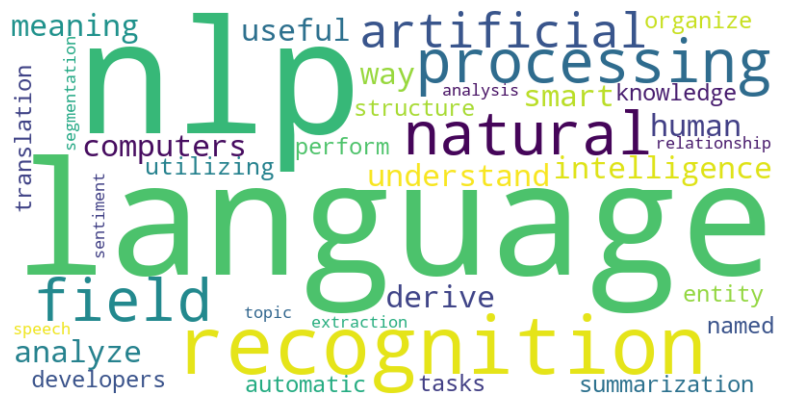

In [10]:
text = """
Natural language processing (NLP) is a field of artificial intelligence in which computers analyze, understand, 
and derive meaning from human language in a smart and useful way. By utilizing NLP, developers can organize 
and structure knowledge to perform tasks such as automatic summarization, translation, named entity recognition, 
relationship extraction, sentiment analysis, speech recognition, and topic segmentation.
"""
stop_words = set(stopwords.words('english'))
words = word_tokenize(text.lower())
filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

filtered_text = ' '.join(filtered_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Отключаем оси
plt.show()

# Work with Movie_reviews

In [11]:
# Total reviews
print (len(movie_reviews.fileids()))
# Review categories
print (movie_reviews.categories()) 
# Total positive reviews
print (len(movie_reviews.fileids('pos')))
# Total negative reviews
print (len(movie_reviews.fileids('neg'))) 
positive_review_file = movie_reviews.fileids('pos')[0] 
print (positive_review_file)

2000
['neg', 'pos']
1000
1000
pos/cv000_29590.txt


In [12]:
movie_reviews.words()

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]

In [13]:
reviews = []
for cat in movie_reviews.categories():
    for fields in movie_reviews.fileids(cat):
        words = movie_reviews.words(fields)
        reviews.append((list(words), cat))
        
df = pd.DataFrame(reviews, columns = ['review', 'sentiment'])

In [14]:
print(df['sentiment'].value_counts())

sentiment
neg    1000
pos    1000
Name: count, dtype: int64


In [15]:
df.head()

,review,sentiment
0,"[plot, :, two, teen, couples, go, to, a, churc...",neg
1,"[the, happy, bastard, ', s, quick, movie, revi...",neg
2,"[it, is, movies, like, these, that, make, a, j...",neg
3,"["", quest, for, camelot, "", is, warner, bros, ...",neg
4,"[synopsis, :, a, mentally, unstable, man, unde...",neg


## WordsCloud for dataset

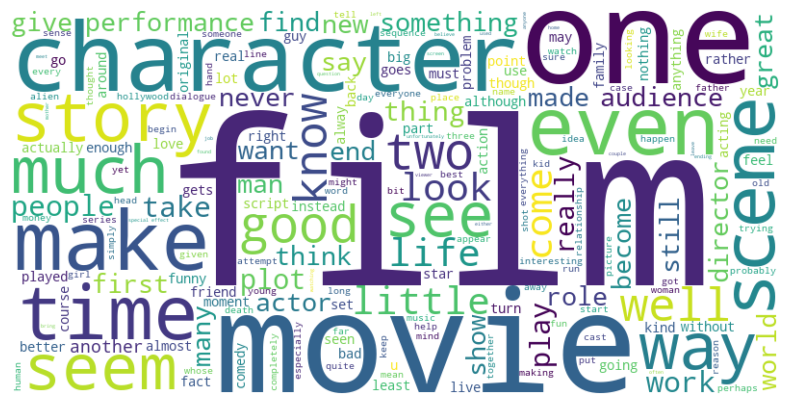

In [16]:
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
text = ' '.join(reviews)
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(text.lower())  
filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]
filtered_text = ' '.join(filtered_words)

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(filtered_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Отключаем оси для чистоты визуализации
plt.show()

## Continue preprocessing

In [17]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Функция для предобработки текста
def preprocess(tokens):
    # Убираем стоп-слова и оставляем только алфавитно-цифровые токены
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Лемматизация
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Возвращаем очищенный текст в виде строки
    return ' '.join(tokens)

# Применяем предобработку к каждому списку токенов в столбце 'review'
df['cleaned_review'] = df['review'].apply(preprocess)

In [18]:
df.iloc[1999]['cleaned_review']

'truman true man burbank perfect name jim carrey character film president truman unassuming man became known worldwide spite stature truman also recall era plenty following grim war era planned community built government scientist promised idyllic life american burbank california brings mind tonight show home nbc hollywood center film world burbank center tv world world protagonist life combine name concept truman burbank get something well describes artificial world truman lead perfect life town car wife picture perfect idea reality come attack one day studio light fall sky radio explains overflying airplane started coming apart would airplane carrying studio light next day drive work radio jam start picking voice exactly describes movement distracted nearly hit pedestrian radio come back normal announcer warns listener drive carefully suspicion aroused wanders around town square looking oddity world appears functioning properly enters office building try take elevator elevator door o

# Vectorization

In [19]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2)) # max_fetaures = 1000
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment'].map({'pos': 1, 'neg': 0})

# Training

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.805
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       199
           1       0.81      0.80      0.80       201

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.80       400
weighted avg       0.81      0.81      0.80       400



Плохо работает на отрицательных отзывах

In [21]:
def predict_sentiment(review):
    cleaned = preprocess(review)
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)
    print(prediction)
    return 'Positive' if prediction == 1 else 'Negative'

print(predict_sentiment("very awfully"))
print(predict_sentiment("It is perfect.I am happy to watch the best film ever"))

[0]
Negative
[0]
Negative


# Next time: SVM and LSTM
# ROC-AUC, F1-score etc

In [22]:
df['cleaned_review'] = df['review'].apply(preprocess)

vectorizer = TfidfVectorizer(ngram_range=(1, 3)) # max_fetaures = 1000
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment'].map({'pos': 1, 'neg': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear', C = 10, probability=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8225
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       199
           1       0.82      0.82      0.82       201

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



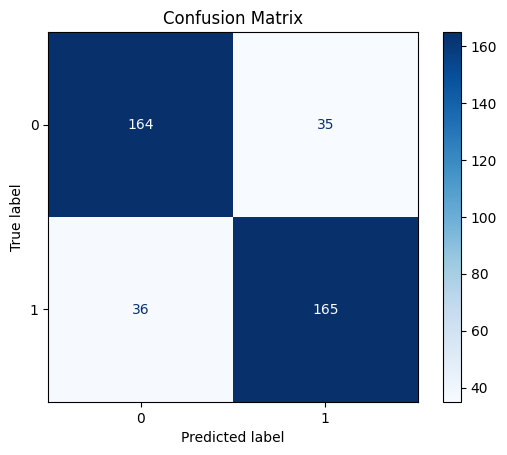

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

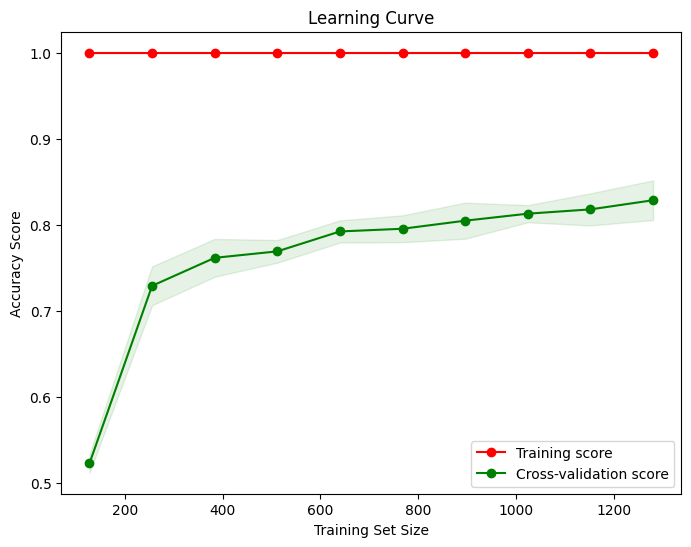

In [24]:
from sklearn.model_selection import learning_curve
import numpy as np

# Вычисление кривых обучения
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Среднее и стандартное отклонение
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_mean, "o-", color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


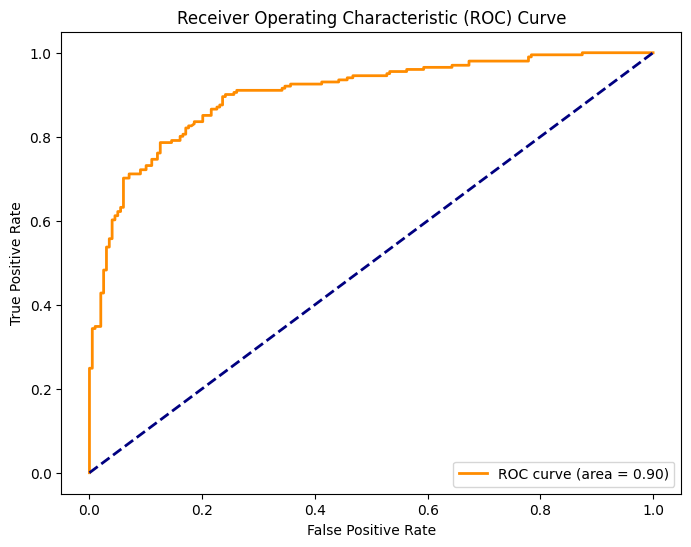

In [25]:
from sklearn.metrics import roc_curve, auc

# Обучаем модель с probability=True
# model = SVC(probability=True)
# model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривой и AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=model.classes_[1])
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

на этапе проверки SVM получается ерунда

In [26]:
def predict_sentiment(review):
    cleaned = preprocess(review)
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)
    print(prediction)
    return 'Positive' if prediction == 1 else 'Negative'

print(predict_sentiment("This movie was very good and pretty nice! I loved it."))

[0]
Negative


# Случайный лес

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(max_depth=25, random_state=42)
model.fit(X_train, y_train)

# model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7825
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       199
           1       0.80      0.75      0.78       201

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



# Using our model

In [28]:
def predict_sentiment(review):
    cleaned = preprocess(review)
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)
    print(prediction)
    return 'Positive' if prediction == 1 else 'Negative'

print(predict_sentiment("very awfully"))
print(predict_sentiment("It is perfect.I am happy to watch the best film ever"))

[1]
Positive
[1]
Positive
